<a href="https://colab.research.google.com/github/sitiaisyah14/Machine-Learning_2022/blob/main/J8_Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Kelompok 10**


1.   Deatrisya Mirela Harahap
2.   Mahisa Aghisni Fadhli 
3.   Siti Aisyah 


#**Confusion Matrix**

**Metode Evaluation Matrics**


1.   Accuracy
2.   Precision
3.   Recall 
4.   Matthew's correlation coefficient 
5.   ROC Curve 
6.   ROC-AUC Score 




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import train_test_split
from sklearn.model_selection import train_test_split
#import accuracy_score,confusion_matrix,classification_report,roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, matthews_corrcoef, roc_curve, roc_auc_score


In [ ]:
##Perintah untuk melakukan import file yang berisi dataset

from google.colab import files
uploaded = files.upload()

Saving wbc.csv to wbc.csv


In [ ]:
#Load data
df = pd.read_csv('wbc.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Seleksi fitur

# Slice dataframe mulai dari kolom 'radius_mean' sampai 'fractal_dimension_worst'
X = df.iloc[:,2:-1]
y = df['diagnosis']
y = y.map({'M':1, 'B':0}) # Encode label

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
df = DecisionTreeClassifier()
df.fit(X_train, y_train)
y_pred = df.predict(X_test) # prediksi

**Perhitungan tabel confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',conf_mat)

Confusion Matrix: 
 [[70  2]
 [ 3 39]]


**Ilustrasi Tabel Confusion Matrix**

Ada empat nilai yang dihasilkan di dalam tabel confusion matrix, di antaranya True Positive (TP), False Positive (FP), False Negative (FN), dan True Negative (TN)

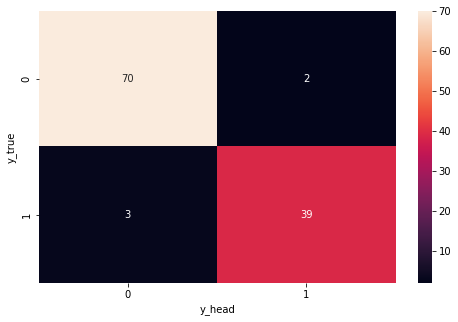

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()


**Penjelasan**



*   True Positive (TP) : Jumlah data yang bernilai Positif dan diprediksi benar sebagai Positif.
*   False Positive (FP) : Jumlah data yang bernilai Negatif tetapi diprediksi sebagai Positif.
*   False Negative (FN) : Jumlah data yang bernilai Positif tetapi diprediksi sebagai Negatif.
*   True Negative (TN) : Jumlah data yang bernilai Negatif dan diprediksi benar sebagai Negatif.

#**Metode Menghitung Accuracy**

In [ ]:
#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 0.96
Test set accuracy: 0.956140350877193


#**Metode Menghitung Precision**

In [ ]:
precision_dt = precision_score(y_test, y_pred)
print("Test set Precision: {:.2f}".format(precision_dt))
print(f"Test set Precision: {precision_dt}")

Test set Precision: 0.95
Test set Precision: 0.9512195121951219


#**Metode Menghitung Recall**

In [ ]:
recall_dt = recall_score(y_test, y_pred)
print("Test set Recall: {:.2f}".format(recall_dt))
print(f"Test set Recall: {recall_dt}")

Test set Recall: 0.93
Test set Recall: 0.9285714285714286


#**Metode Menghitung Matthew's correlation coefficient**

In [ ]:
mc_dt = matthews_corrcoef(y_test, y_pred)
print("Test set Matthew's correlation coefficient: {:.2f}".format(mc_dt))
print(f"Test set Matthew's correlation coefficient: {mc_dt}")

Test set Matthew's correlation coefficient: 0.91
Test set Matthew's correlation coefficient: 0.9054466190452621


#**Metode Menghitung ROC Curve**

**Dihitung berdasarkan Metode DecisionTree**

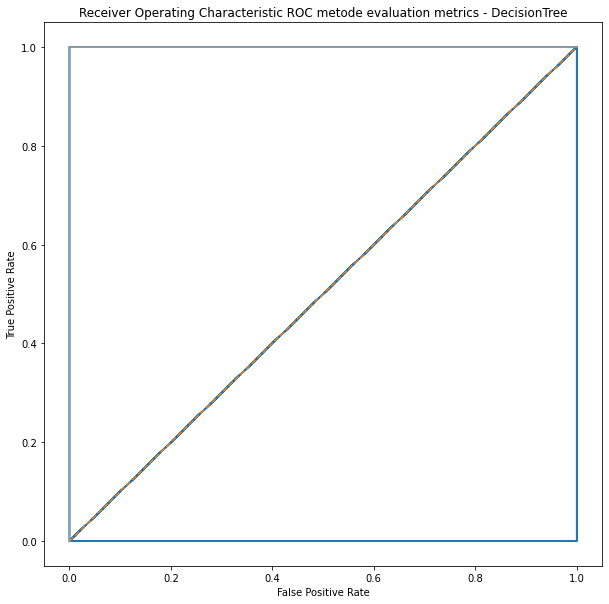

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic ROC metode evaluation metrics - DecisionTree')
plt.plot(y_test, y_pred)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".6")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Dihitung Berdasarkan menggunakan fungsi get_confusion_matrix dan get_roc_curve**

In [ ]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [ ]:
def get_roc_curve(y_test, y_pred, delta=0.1):

    thresh = list(np.arange(0, 1, delta)) + [1]
    TPRs = []
    FPRs = []
    y_pred = np.empty(y_pred.shape)
    for th in thresh:
        y_pred[y_pred < th] = 0
        y_pred[y_pred >= th] = 1
        
        
        (TN, FP), (FN, TP) = get_confusion_matrix(y_test, y_pred)
        
        TPR = TP / (TP + FN)  # sensitivity
        FPR = FP / (FP + TN)  # 1 - specificity
        TPRs.append(TPR)
        FPRs.append(FPR)
    return FPRs, TPRs, thresh

In [ ]:
delta = 0.00001
FPRs, TPRs, _ = get_roc_curve(y_test, y_pred, delta)

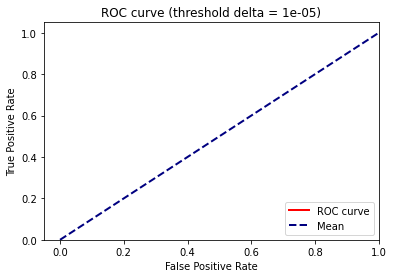

In [ ]:
plt.plot(FPRs, TPRs, color='red',
         lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (threshold delta = {delta})')
plt.legend(loc="lower right")
plt.show()

#**Metode Menghitung ROC-AUC Score**

In [ ]:
roc_auc_dt = roc_auc_score(y_test, y_pred)
print("Test set Matthew's correlation coefficient: {:.2f}".format(roc_auc_dt))
print(f"Test set Matthew's correlation coefficient: {roc_auc_dt}")

Test set Matthew's correlation coefficient: 0.95
Test set Matthew's correlation coefficient: 0.9503968253968254


# **Hasil Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

